In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
data=pd.read_csv("housing.csv")

In [270]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [245]:
data.dropna(inplace=True)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [247]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

In [249]:
train_data = X_train.join(y_train)

In [250]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16070,-122.49,37.75,45.0,2341.0,461.0,1092.0,438.0,4.8036,NEAR OCEAN,297800.0
18785,-122.37,40.45,18.0,1748.0,337.0,921.0,327.0,3.3315,INLAND,85400.0
1580,-122.02,37.87,14.0,3056.0,369.0,1209.0,377.0,8.4352,NEAR BAY,441400.0
13986,-117.06,34.87,14.0,3348.0,619.0,1756.0,557.0,3.5987,INLAND,91400.0
10805,-117.94,33.62,25.0,1188.0,264.0,569.0,249.0,3.6607,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
9235,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,INLAND,81600.0
13761,-117.09,34.01,37.0,106.0,18.0,27.0,12.0,4.0556,INLAND,131300.0
15486,-117.13,33.14,5.0,2618.0,539.0,1320.0,512.0,4.1053,<1H OCEAN,171400.0
19261,-122.74,38.44,23.0,2819.0,612.0,1644.0,546.0,2.6576,<1H OCEAN,147900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

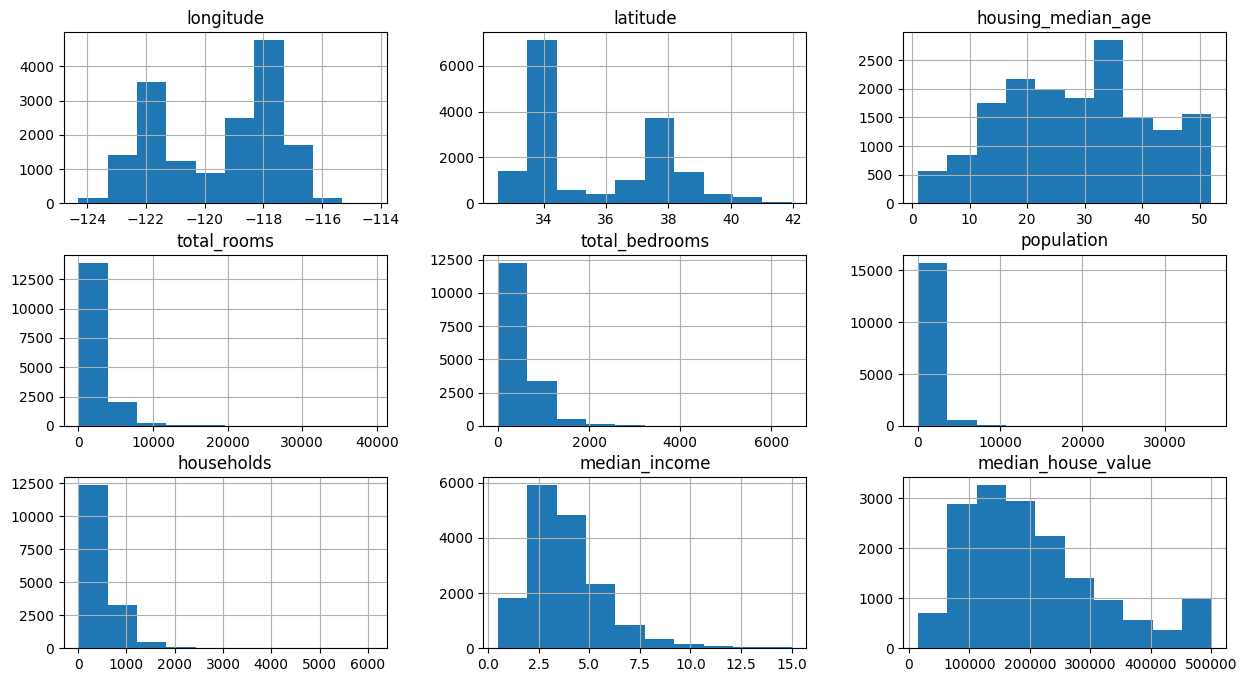

In [251]:
train_data.hist(figsize=(15,8))

<Axes: >

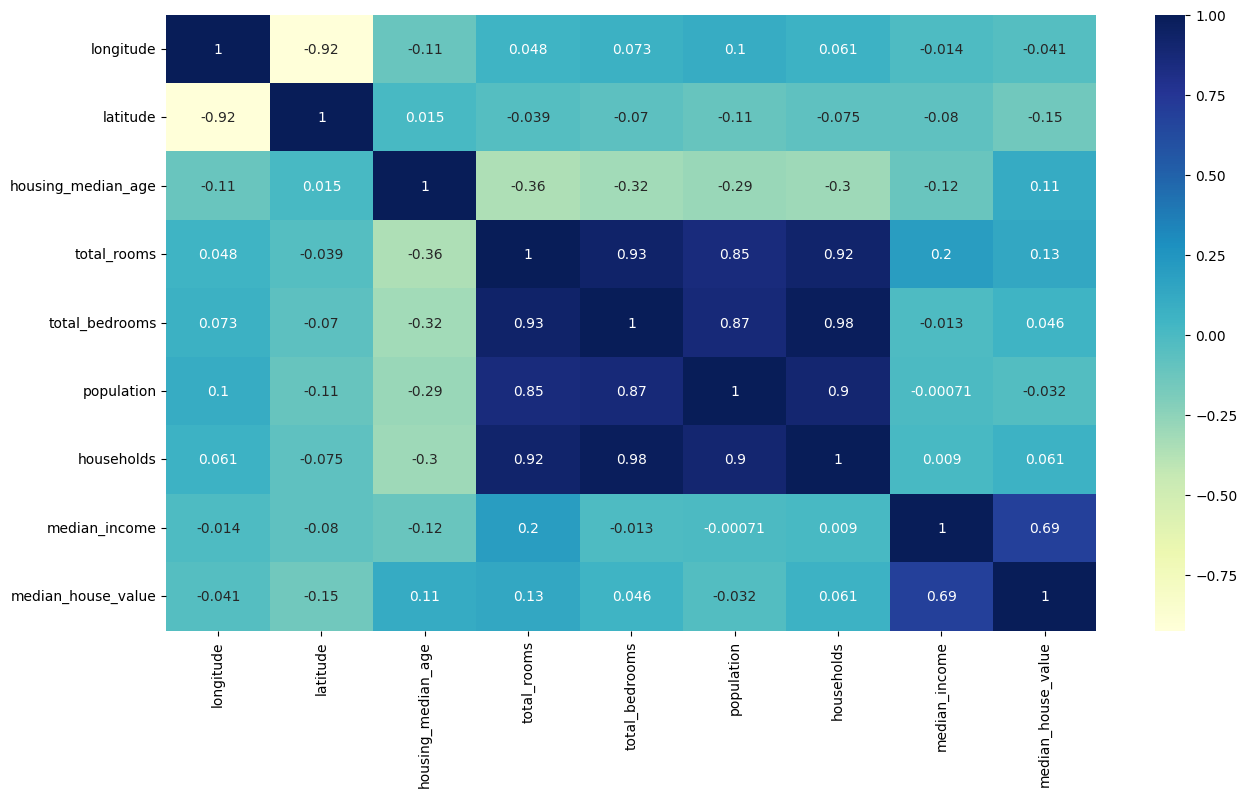

In [252]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [253]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

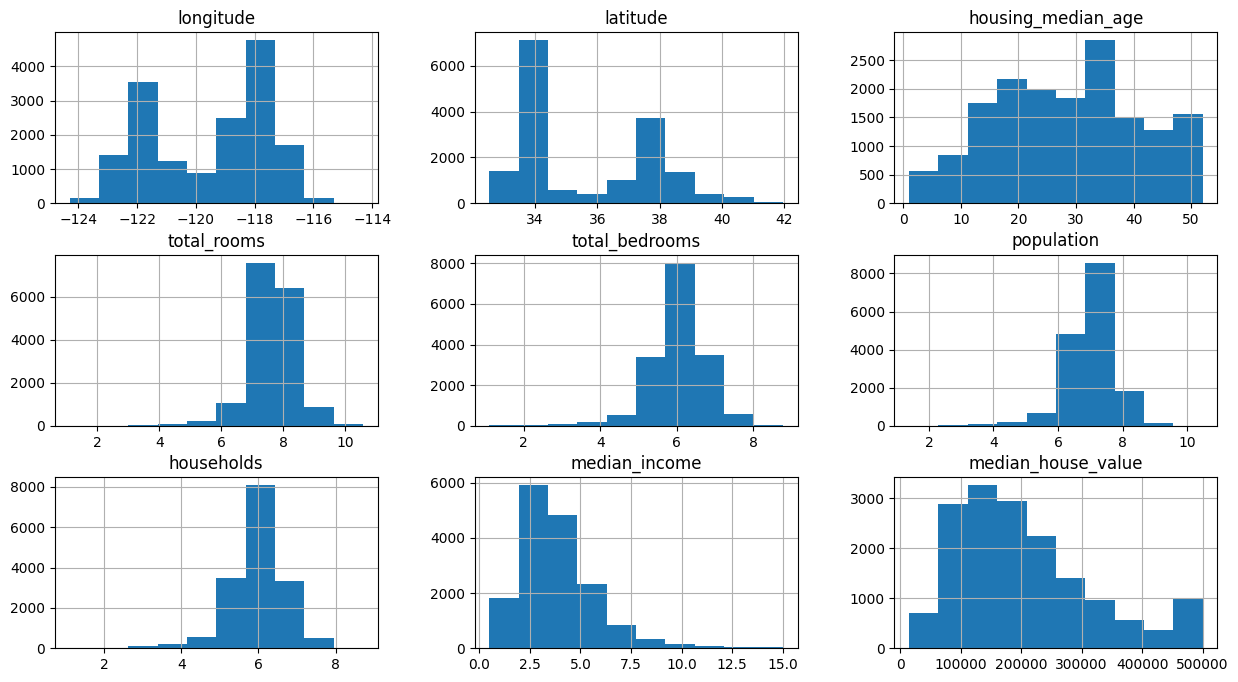

In [254]:
train_data.hist(figsize=(15,8))

In [255]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7161
INLAND        5209
NEAR OCEAN    2138
NEAR BAY      1834
ISLAND           4
Name: count, dtype: int64

In [256]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
train_data=train_data.replace({True:1,False:0})
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16070,-122.49,37.75,45.0,7.758761,6.135565,6.996681,6.084499,4.8036,297800.0,0,0,0,0,1
18785,-122.37,40.45,18.0,7.466799,5.823046,6.826545,5.793014,3.3315,85400.0,0,1,0,0,0
1580,-122.02,37.87,14.0,8.025189,5.913503,7.098376,5.934894,8.4352,441400.0,0,0,0,1,0
13986,-117.06,34.87,14.0,8.116417,6.429719,7.471363,6.324359,3.5987,91400.0,0,1,0,0,0
10805,-117.94,33.62,25.0,7.080868,5.579730,6.345636,5.521461,3.6607,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,-120.09,37.02,9.0,7.383368,5.697093,6.964136,5.690359,3.7143,81600.0,0,1,0,0,0
13761,-117.09,34.01,37.0,4.672829,2.944439,3.332205,2.564949,4.0556,131300.0,0,1,0,0,0
15486,-117.13,33.14,5.0,7.870548,6.291569,7.186144,6.240276,4.1053,171400.0,1,0,0,0,0
19261,-122.74,38.44,23.0,7.944492,6.418365,7.405496,6.304449,2.6576,147900.0,1,0,0,0,0


<Axes: >

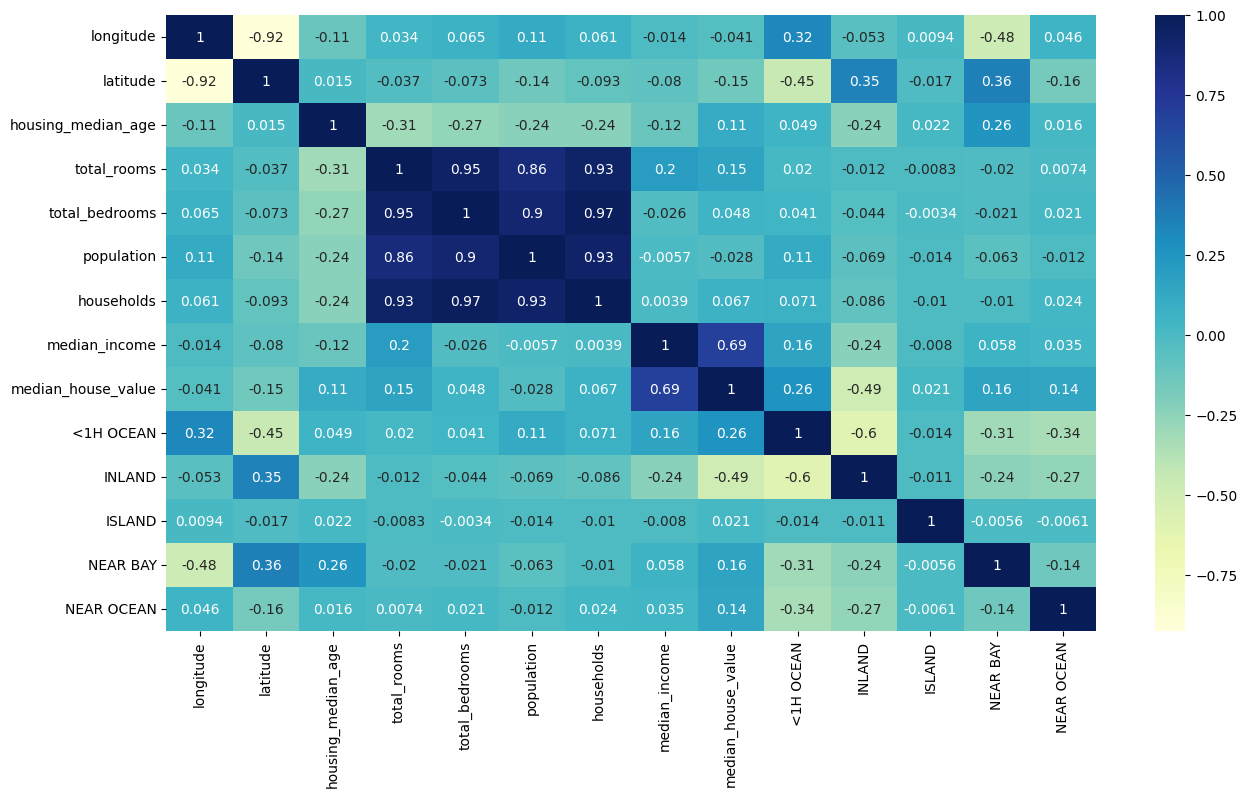

In [257]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

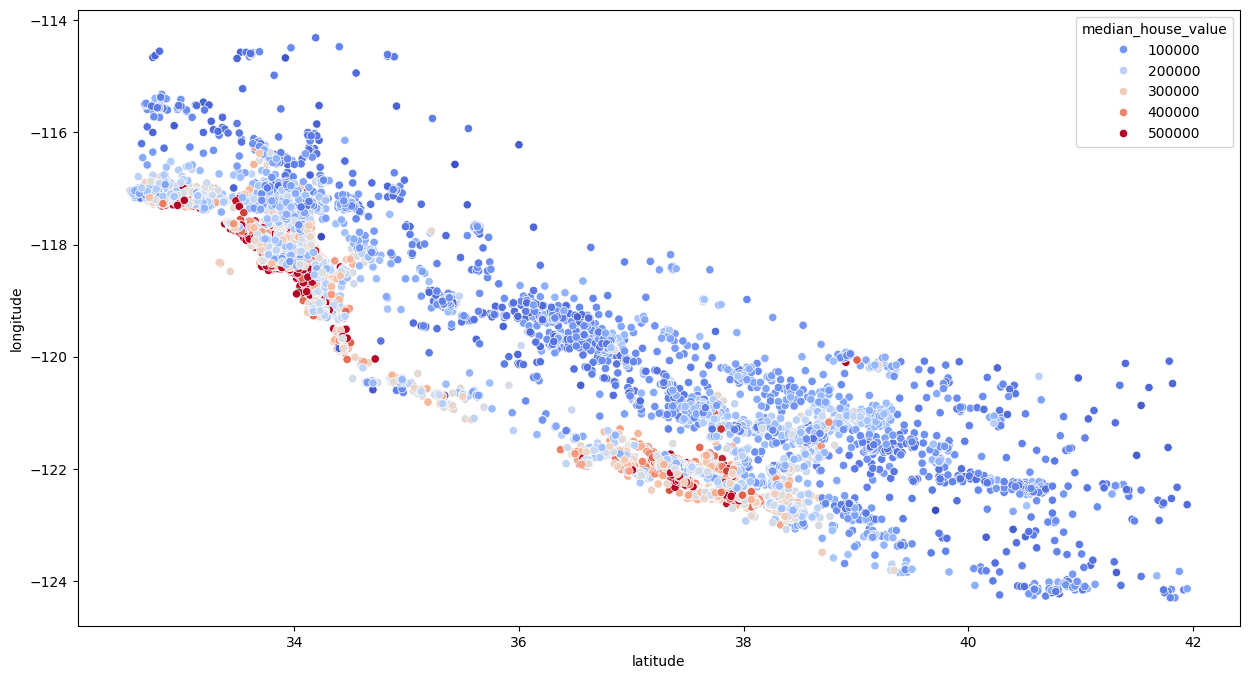

In [258]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue="median_house_value", palette="coolwarm")

In [259]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']

<Axes: >

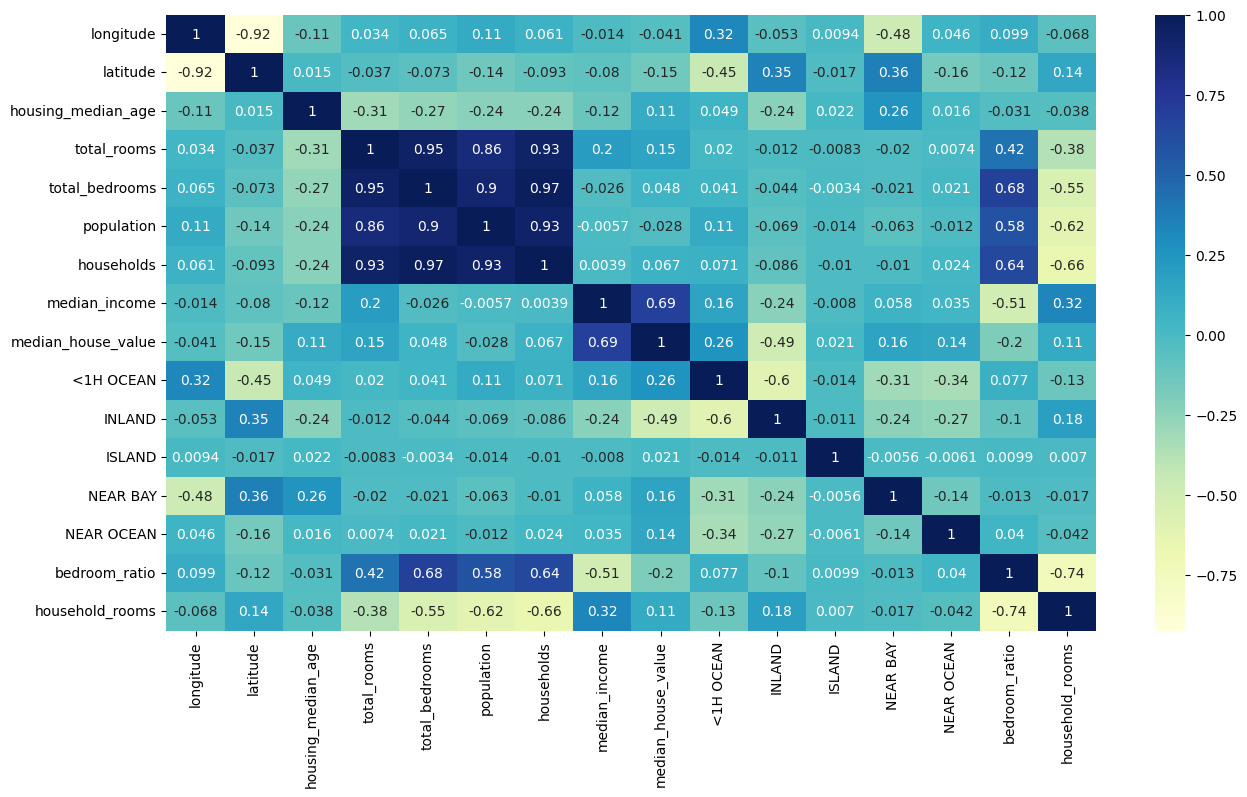

In [260]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train,y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s= scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [262]:
test_data = X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data=test_data.replace({True:1,False:0})

test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']

In [263]:
X_test,y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [264]:
X_test_s=scaler.transform(X_test)

In [265]:
reg.score(X_test_s, y_test)

0.6666706632636166

In [272]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [273]:
forest.score(X_test_s,y_test)

0.8248265430729055